In [1]:
import astropy.units as u
import astropy.constants as const
import numpy as np
from astropy.cosmology import WMAP9 as cosmo
from decimal import Decimal
import seaborn as sns

h = .6932

In [33]:
def distance(redshift):
    '''gets a distance (in megaparsecs) from a redshift value'''    
    H_0 = cosmo.H(0) # 69.32 km/s/Mpc
    d = const.c.to('km/s')*redshift/H_0
    return d

In [36]:
def luminosity(Magnitude):
    '''gives the Luminosity (in total solar luminosity) of a given object with an absolute magnitude given'''
    
    Lum = 10**(-(Magnitude-4.77)/2.5) *u.solLum
    return Lum

In [5]:
def Mass2Light(mass,luminosity):
    # takes in the mass and luminosity of a galaxy, and returns the mass to light ratio
    
    M_to_L = mass / luminosity
    return M_to_L

In [38]:
z_5523 = 0.00347 # redshift for NGC 5523
M_5523 = -19.75 # i-band mag for 5523

z_4414 = 0.00239 # redshift for NGC 4414
M_4414 = -21.65 # i-band mag for 4414


d_5523 = distance(z_5523) # Mpc
d_4414 = distance(z_4414) # Mpc

print("Distance to NGC5523 = %s" %(d_5523))
print("Distance to NGC4414 = %s" % (d_4414))

6426877173.170194 solLum
Distance to NGC5523 = 15.006921945470285 Mpc
Distance to NGC4414 = 10.336179668493942 Mpc


In [40]:
L_i_5523 = luminosity(M_5523)
L_i_4414 = luminosity(M_4414)

print("Luminosity of NGC5523 = {:.2E}".format(L_i_5523))
print("Luminosity of NGC4414 = {:.2E}".format(L_i_4414))

Luminosity of NGC5523 = 6.43E+09 solLum
Luminosity of NGC4414 = 3.70E+10 solLum


In [6]:
# mass for ngc 4414 from Vallejo et al. 2002
M_4414 = 9.25E10 *u.solMass

# correct for gas
M_neutral_gas = 1.5E10 * u.solMass # neutral gas component (HI, H_2, and associated He)
M_molecular = 6.5E9 *u.solMass #molecular gas (water, etc.)
M_atomic = 8.4E9 * u.solMass # other atomic gasses
M_stellar_4414 = M_4414 - M_neutral_gas - M_molecular - M_atomic
print("Stellar Mass of NGC4414 = {:.2E}".format(M_stellar_4414))
#the mass subtraction is not perfect

M_to_L_4414 = Mass2Light(M_stellar_4414, L_i_4414)
print("M_stellar / L_i for NGC 4414 = {:.2E}".format(M_to_L_4414))

Stellar Mass of NGC4414 = 6.26E+10 solMass
M_stellar / L_i for NGC 4414 = 1.60E+00 solMass / solLum


In [7]:
# mass for NGC 5523 from Fulmer et al. 2018
M_stellar_5523 = 1E10 *u.solMass #this mass is approximate, will do more digging
'''Note: table 4: all values in table 4 are derived from apphot analyses of a sky-subtracted 3.6 micrometer 
image of NGC 5523.  The calcs of stellar masses assume M_o/L_o = 1.0.'''
print("Stellar Mass of NGC5523 = {:.2E}".format(M_stellar_5523))

M_to_L_5523 = Mass2Light(M_stellar_5523, L_i_5523)
print("M_stellar / L_i for NGC 5523 = {:.2E}".format(M_to_L_5523))


Stellar Mass of NGC5523 = 1.00E+10 solMass
M_stellar / L_i for NGC 5523 = 1.47E+00 solMass / solLum


# This next section is for elliptical galaxies

In [8]:
def i_mag(M_r, color):
    '''this function takes the r-i color and the r band absolute magnitude of the i band'''
    
    M_i = M_r - color
    return M_i


In [9]:
# UK 1197 (***says irregular galaxy***)
M_r_1197 = -19.876 # r band magnitude
C_1197 = 0.370 # r-i color
Z_1197 = 0.0318 # redshift

M_i_1197= i_mag(M_r_1197,C_1197)
print("i-band Magnitude of UK 1197 = {0:.{1}f}".format(M_i_1197,4))

#UK 0613
M_r_0613 = -19.731 # 
C_0613 = 0.368 # r-i color
Z_0613 = 0.0272 # redshift

M_i_0613= i_mag(M_r_0613,C_0613)
print("i-band Magnitude of UK 0613 = {0:.{1}f}".format(M_i_0613,4))

#UK 1394
M_r_1394 = -19.954 # 
C_1394 = 0.38 # r-i color
Z_1394 = 0.0347 # redshift

M_i_1394= i_mag(M_r_1394,C_1394)
print("i-band Magnitude of UK 1394 = {0:.{1}f}".format(M_i_1394,4))

#UGC 03960
M_r_03960 = -18.178 # 
C_03960 = 0.350 # r-i color
Z_03960 = 0.0075 # redshift

M_i_03960= i_mag(M_r_03960,C_03960)
print("i-band Magnitude of UGC 03960 = {0:.{1}f}".format(M_i_03960,4))



i-band Magnitude of UK 1197 = -20.2460
i-band Magnitude of UK 0613 = -20.0990
i-band Magnitude of UK 1394 = -20.3340
i-band Magnitude of UGC 03960 = -18.5280


In [42]:
L_i_1197 = luminosity(M_i_1197)
L_i_0613 = luminosity(M_i_0613)
L_i_1394 = luminosity(M_i_1394)
L_i_03960 = luminosity(M_i_03960)

print('i-band Luminosity of UK 1197 = {:.3E}'.format(L_i_1197))
print('i-band Luminosity of UK 0613 = {:.3E}'.format(L_i_0613))
print('i-band Luminosity of UK 1394 = {:.3E}'.format(L_i_1394))
print('i-band Luminosity of UGC 03960 = {:.3E}'.format(L_i_03960))

i-band Luminosity of UK 1197 = 1.015E+10 solLum
i-band Luminosity of UK 0613 = 8.863E+09 solLum
i-band Luminosity of UK 1394 = 1.101E+10 solLum
i-band Luminosity of UGC 03960 = 2.085E+09 solLum


In [55]:
d_1197 = distance(Z_1197)
print("Distance to UK 1197 = {0:.{1}f}".format(d_1197,4))
d_0613 = distance(Z_0613)
print("Distance to UK 0613 = {0:.{1}f}".format(d_0613,4))
d_1394 = distance(Z_1394)
print("Distance to UK 1394 = {0:.{1}f}".format(d_1394,4))
d_03960 = distance(Z_03960)
print("Distance to UGC 03960 = {0:.{1}f}".format(d_03960,4))

Distance to UK 1197 = 137.5274 Mpc
Distance to UK 0613 = 117.6335 Mpc
Distance to UK 1394 = 150.0692 Mpc
Distance to UGC 03960 = 32.4357 Mpc


In [58]:
# first, we do the stellar mass per luminosity, 
# from UGC 03960
M_stellar_03960 = 10**10.09 *u.solMass
print("Stellar Mass of UGC 03960 = {:.2E}".format(M_stellar_03960))

M_to_L_03960 = Mass2Light(M_stellar_03960, L_i_03960)
print("M_stellar / L_i for UGC 03960 = {:.2E}".format(M_to_L_03960))

print()

#lets do 1197
M_stellar_1197 = 10**10.15/(h**2)*u.solMass
print("Stellar Mass of UK 1197 = {:.2E}".format(M_stellar_1197))

M_to_L_1197 = Mass2Light(M_stellar_1197, L_i_1197)
print("M_stellar / L_i for UK 1197 = {:.2E}".format(M_to_L_1197))

print()
#now 613
M_stellar_0613 = 10**10.35 / (h**2) *u.solMass
print("Stellar Mass of UK 0613 = {:.2E}".format(M_stellar_0613))

M_to_L_0613 = Mass2Light(M_stellar_0613,L_i_0613)
print("M_stellar / L_i for UK 0613 = {:.2E}".format(M_to_L_0613))

print()
# and 1394
M_stellar_1394 = 10**10.13 / (h**2) *u.solMass
print("Stellar Mass of UK 1394 = {:.2E}".format(M_stellar_1394))

M_to_L_1394 = Mass2Light(M_stellar_1394,L_i_1394)
print("M_stellar / L_i for UK 1394 = {:.2E}".format(M_to_L_1394))

Stellar Mass of UGC 03960 = 1.23E+10 solMass
M_stellar / L_i for UGC 03960 = 5.90E+00 solMass / solLum

Stellar Mass of UK 1197 = 2.94E+10 solMass
M_stellar / L_i for UK 1197 = 2.90E+00 solMass / solLum

Stellar Mass of UK 0613 = 4.66E+10 solMass
M_stellar / L_i for UK 0613 = 5.26E+00 solMass / solLum

Stellar Mass of UK 1394 = 2.81E+10 solMass
M_stellar / L_i for UK 1394 = 2.55E+00 solMass / solLum


# Let's look at the Halo Mass data we have

In [60]:
#UK1197
M_halo_1197 = 10**11.8 / h*u.solMass
print("Halo Mass of UK 1197 = {:.2E}".format(M_halo_1197))
M_halo_to_L_1197 = Mass2Light(M_halo_1197,L_i_1197)
print("Mass to Light for UK 1197 = {:.4E}".format(M_halo_to_L_1197))

print()
#UK0613
M_halo_0613 = 10**12.0 / h *u.solMass
print("Halo Mass of UK 0613 = {:.2E}".format(M_halo_0613))
M_halo_to_L_0613 = Mass2Light(M_halo_0613,L_i_0613)
print("Mass to Light for UK 0613 = {:.4E}".format(M_halo_to_L_0613))

print()
# UK 1394
M_halo_1394 = 10**11.75 / h *u.solMass
print("Halo Mass of UK 0613 = {:.2E}".format(M_halo_0613))

M_halo_to_L_1394 = Mass2Light(M_halo_1394,L_i_1394)
print("Mass to Light for UK 1394 = {:.4E}".format(M_halo_to_L_1394))

Halo Mass of UK 1197 = 9.10E+11 solMass
Mass to Light for UK 1197 = 8.9689E+01 solMass / solLum

Halo Mass of UK 0613 = 1.44E+12 solMass
Mass to Light for UK 0613 = 1.6276E+02 solMass / solLum

Halo Mass of UK 0613 = 1.44E+12 solMass
Mass to Light for UK 1394 = 7.3713E+01 solMass / solLum


In [50]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

stellar_masses = [M_stellar_4414.value, M_stellar_5523.value,M_stellar_03960.value,M_stellar_0613.value, 
                  M_stellar_1197.value,M_stellar_1394.value]
M_stellar_per_L = [M_to_L_4414.value, M_to_L_5523.value,M_to_L_03960.value,M_to_L_0613.value,
                   M_to_L_1197.value,M_to_L_1394.value]

In [51]:
# creating a dataset
M_stellar_MW=4.5E10 *u.solMass #+-1.5 error
M_stellar_M31 = 10.3E10 *u.solMass #+2.3, -1.7 errors

L_i_MW = 3E10 *u.solLum
L_i_M31 = 3.5E10 *u.solLum

M_to_L_MW = Mass2Light(M_stellar_MW,L_i_MW)
M_to_L_M31 = Mass2Light(M_stellar_M31, L_i_M31)

M_stel_to_L = {'Galaxy': ['Milky Way', 'Andromeda','NGC 4414','NGC 5523', 'UGC 03960','UK 0613','UK 1197','UK 1394'], 
'Type': ['Spiral','Spiral','Spiral','Spiral','Elliptical','Elliptical','Elliptical',
           'Elliptical'], 
'Stellar Mass': [M_stellar_MW.value, M_stellar_M31.value,M_stellar_4414.value, M_stellar_5523.value,M_stellar_03960.value,M_stellar_0613.value, 
                  M_stellar_1197.value,M_stellar_1394.value],
'M_stellar_to L_i': [M_to_L_MW.value,M_to_L_M31.value,M_to_L_4414.value, M_to_L_5523.value,M_to_L_03960.value,M_to_L_0613.value,
                   M_to_L_1197.value,M_to_L_1394.value]}

dataset = pd.DataFrame(data=M_stel_to_L)
print(dataset)

      Galaxy        Type  Stellar Mass  M_stellar_to L_i
0  Milky Way      Spiral  4.500000e+10          1.500000
1  Andromeda      Spiral  1.030000e+11          2.942857
2   NGC 4414      Spiral  6.260000e+10          1.601023
3   NGC 5523      Spiral  1.000000e+10          1.472754
4  UGC 03960  Elliptical  1.230269e+10          5.899293
5    UK 0613  Elliptical  4.658895e+10          5.256333
6    UK 1197  Elliptical  2.939564e+10          2.896562
7    UK 1394  Elliptical  2.807262e+10          2.550838


([<matplotlib.axis.XTick at 0x1a1871a6d8>,
 <a list of 9 Text xticklabel objects>)

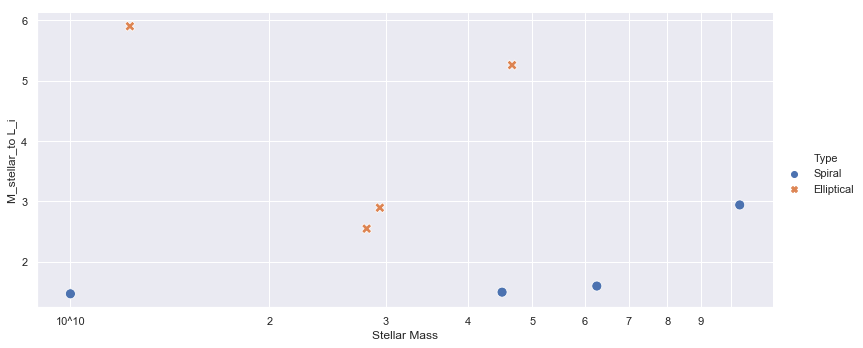

In [52]:
sns.set()
sns.relplot(x= "Stellar Mass", y = "M_stellar_to L_i", hue = "Type", style = "Type", 
            data = dataset, height = 5, aspect=11/5, s = 100)
plt.xscale('log',basex=10) 

xticks= [1E10,2E10,3E10,4E10,5E10,6E10,7E10,8E10,9E10,1E11]
xlabels = ['10^10','2','3','4','5','6','7','8','9']
plt.xticks(ticks=xticks,labels= xlabels)

In [53]:
M_halo_MW = 1.5E12 *u.solMass
M_halo_M31 = 2E12 *u.solMass

M_halo_to_L_MW = Mass2Light(M_halo_MW,L_i_MW)
M_halo_to_L_M31 = Mass2Light(M_halo_M31, L_i_M31)

M_halo_to_LTABLE = {'Galaxy': ['Milky Way', 'Andromeda','UK 0613','UK 1197','UK 1394'], 
'Type': ['Spiral','Spiral','Elliptical','Elliptical',
           'Elliptical'], 
'Halo_Mass': [M_halo_MW.value, M_halo_M31.value, M_halo_0613.value, 
                  M_halo_1197.value,M_halo_1394.value],
'M_halo_to L_i': [M_halo_to_L_MW.value,M_halo_to_L_M31.value,M_halo_to_L_0613.value,
                   M_halo_to_L_1197.value,M_halo_to_L_1394.value]}

halodata = pd.DataFrame(data=M_halo_to_LTABLE)
print(halodata)

      Galaxy        Type     Halo_Mass  M_halo_to L_i
0  Milky Way      Spiral  1.500000e+12      50.000000
1  Andromeda      Spiral  2.000000e+12      57.142857
2    UK 0613  Elliptical  1.442585e+12     162.757663
3    UK 1197  Elliptical  9.102097e+11      89.689468
4    UK 1394  Elliptical  8.112252e+11      73.712552


([<matplotlib.axis.XTick at 0x1a19b63c88>,
 <a list of 7 Text xticklabel objects>)

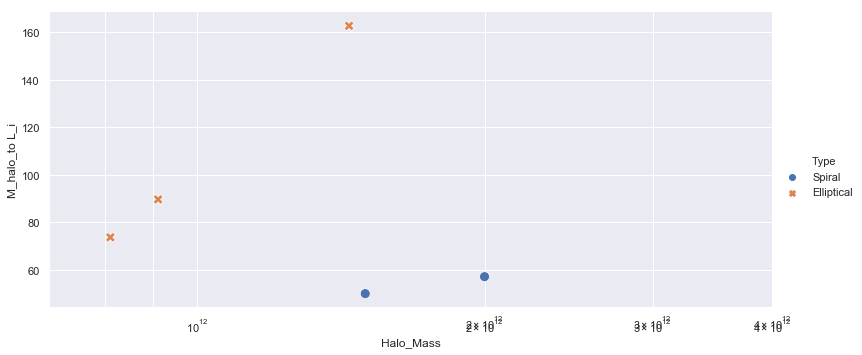

In [54]:
sns.set()
sns.relplot(x= "Halo_Mass", y = "M_halo_to L_i", hue = "Type", style = "Type", 
            data = halodata, height = 5, aspect=11/5, s = 100)
plt.xscale('log',basex=10) 

xticks= [7E11,8E11,9E11,1E12,2E12,3E12,4E12]
# xlabels = ['5','6','7','8','9','1E12','2','3']
plt.xticks(ticks=xticks)